In [1]:
import carla
import random
import Controller.PIDController as PIDController
import Controller.MPCController as MPCController
import math
import numpy as np
from Utils.synch_mode import CarlaSyncMode
import time
from Utils.utils import *
import pygame

pygame 2.5.2 (SDL 2.28.3, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [146]:
speed = 13.2285009239462026
x = -16.842267990112305
y = -223.22581481933594
yaw = 1.5481880865109414
wp = [[-16.842267990112305, -223.22581481933594, 0.0, 1.2295178873288235], [-14.934813757798112, -217.56050297954596, 0.0, 1.2788849523922121], [-13.570800910472931, -211.65647296667348, 0.0, 1.4232967392734457], [-13.389941634925464, -205.589677844538, 0.0, 1.6850661456339946], [-15.14255852407123, -199.9906652815648, 0.0, 2.051803250627153], [-18.50294038007302, -194.93976996692965, 0.0, 2.2261284040873046]]

prev_deltas = [-0.24681479, -0.40674397, -0.24680603, -0.12345067,  0.        ]
prev_accelerations = [1.99999931, 1.94880953, 1.4488118,  0.94881729, 0.        ]

# -0.024725760861193873
# VehicleControl(throttle=1.000000, steer=-0.040477, brake=0.000000, hand_brake=False, reverse=False, manual_gear_shift=False, gear=0)

In [147]:
waypoints = np.array(wp).T

In [148]:
waypoints

array([[ -16.84226799,  -14.93481376,  -13.57080091,  -13.38994163,
         -15.14255852,  -18.50294038],
       [-223.22581482, -217.56050298, -211.65647297, -205.58967784,
        -199.99066528, -194.93976997],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   1.22951789,    1.27888495,    1.42329674,    1.68506615,
           2.05180325,    2.2261284 ]])

In [110]:
# Control input : speed : 0.16322136667055326, current position : -16.893117904663086, -223.4849395751953, yaw : 1.5896142230573964

x0 = np.array([[x], [y], [speed], [yaw]])

In [111]:
x0

array([[ -16.84226799],
       [-223.22581482],
       [  13.22850092],
       [   1.54818809]])

In [7]:
len_horizon = 6


In [9]:
dt = 0.2

In [49]:
prev_deltas = list(np.array([0.0] * len_horizon)) # [-0.24681479, -0.40674397, -0.24680603, -0.12345067,  0.        ]
prev_accelerations =  list(np.array([0.0] * len_horizon)) # [1.99999931, 1.94880953, 1.4488118,  0.94881729, 0.        ]
dt = 0.2

In [112]:
prev_deltas

[-0.24681479, -0.40674397, -0.24680603, -0.12345067, 0.0]

In [11]:
import cvxpy

In [149]:
z_initial = x0
z_ref = waypoints

In [13]:
import numpy as np


# State Cost
# Q = np.eye(4)
Q = np.array([[  2.5,  0,  0,  0],
                [  0,  2.5,  0,  0],
                [  0,  0,  1.1,  0],
                [  0,  0,  0,  5.5]])

# Terminal Cost
Qf = np.array([[  3.5,  0,  0,  0],
                [  0,  3.5,  0,  0],
                [  0,  0,  1.5,  0],
                [  0,  0,  0,  3.5]])

# Control Cost 1) acceleration 2) steer rate
R = np.eye(2)

dist = 4.5

# State change cost
Rd = np.array([[1, 0],
                [0 ,1]])

# Horizon

# Constrains
max_steering_angle = 0.61 #0.611 rad = 35º

a_max = 2

a_min = -3

a_rate_max = 1

steer_rate_max = 0.15

v_min = -1

v_max = 40


In [35]:
physic_control = player.get_physics_control()
lf, lr, L = get_vehicle_wheelbases(physic_control.wheels, physic_control.center_of_mass )


In [14]:
lr = 0.449999

In [15]:
L = 3.004633

In [16]:
lf = 2.554633

In [103]:
def get_linearized_dynamics(self, yaw, delta, v, dt=0.01):
    # A = np.eye(4)
    # A[0, 2] = np.cos(yaw) * dt
    # A[0, 3] = -v * np.sin(yaw) * dt
    # A[1, 2] = np.sin(yaw) * dt
    # A[1, 3] = v * np.cos(yaw) * dt
    # A[3, 2] = np.tan(delta) * dt / L

    # B = np.zeros((4, 2))
    # B[2, 0] = dt
    # B[3, 1] = v * dt / (L * np.cos(delta)**2)

    # C = np.zeros((4, 1))
    # C[0, 0] = v * np.sin(yaw) * yaw * dt
    # C[1, 0] = - v * np.cos(yaw) * yaw * dt
    # C[3, 0] = - v * delta * dt / (L * np.cos(delta)**2)



    # A = np.eye(4)
    # A[0, 0] = 0
    # A[0, 1] = 0
    # A[0, 2] = np.cos(yaw + math.atanh((lr*math.tan(delta))/L)) * dt
    # A[0, 3] = -v * np.sin(yaw + math.atanh((lr*math.tan(delta))/L)) * dt
    
    # A[1, 0] = 0
    # A[1, 1] = 0
    # A[1, 2] = np.sin(yaw + math.atanh((lr*math.tan(delta))/L)) * dt
    # A[1, 3] = v * np.cos(yaw + math.atanh((lr*math.tan(delta))/L)) * dt


    # A[2, 0] = 0
    # A[2, 1] = 0
    # A[2, 2] = 0
    # A[2, 3] = 0

    # A[3, 0] = 0
    # A[3, 1] = 0
    # A[3, 2] = math.tan(delta)/(L*np.sqrt((lr**2*math.tan(delta)**2)/L**2 + 1)) * dt
    # A[3, 3] = 0


    # B = np.zeros((4, 2))
    # B[0, 1] =  -(lr*v*np.sin(yaw + math.atan((lr*math.tan(delta))/L))*(math.tan(delta)**2 + 1))/(L*((lr**2*math.tan(delta)**2)/L**2 + 1)) * dt
    # B[1, 1] = (lr*v*np.cos(yaw + math.atan((lr*math.tan(delta))/L))*(math.tan(delta)**2 + 1))/(L*((lr**2*math.tan(delta)**2)/L**2 + 1))* dt
    # B[2, 0] = 1* dt
    # B[3, 1] = (v*(math.tan(delta)**2 + 1))/(L*((lr**2*math.tan(delta)**2)/L**2 + 1)**(1/2)) - (lr**2*v*math.tan(delta)**2*(math.tan(delta)**2 + 1))/(L**3*((lr**2*math.tan(delta)**2)/L**2 + 1)**(3/2))* dt


    tandelta = math.tan(delta)
    angel = yaw + math.atanh((lr*tandelta)/L)
    deno1 = np.tan(delta)**2 + 1
    deno2 = (lr**2*tandelta**2)/L**2 + 1
    deno3 = L * np.sqrt(deno2)
    # # print(f"angles {yaw}, {angel}, {tandelta}")

    A = np.array([[ 0, 0, np.cos(angel), -v*np.sin(angel)],
                [ 0, 0, np.sin(angel),  v*np.cos(angel)],
                [ 0, 0, 0, 0],
                [ 0, 0, tandelta/deno3, 0]]) * dt
    A = A + np.eye(4)

    B = np.array([[ 0, -(lr*v*np.sin(angel)*(deno1))/(L*(deno2))],
                [ 0, (lr*v*np.cos(angel)*(deno1))/(L*(deno2))],
                [ 1, 0],
                [ 0, (v*(deno1))/deno3 - (lr**2*v*tandelta**2*(deno1))/(deno3**3)]])
    B *= dt

    C = np.zeros((4, 1))
    C[0, 0] = yaw*v*np.sin(angel) + (delta*lr*v*np.sin(angel)*deno1)/(L*(deno2))
    C[1, 0] = -yaw*v*np.cos(angel) - (delta*lr*v*np.cos(angel)*deno1)/(L*(deno2))
    C[2, 0] = 0
    C[3, 0] = -delta*(v*deno1)/(deno3) - (lr**2*v*tandelta**2*deno1)/(deno3**3)
    C *= dt

    return A, B, C

In [72]:
z = cvxpy.Variable((4, len_horizon + 1))
u = cvxpy.Variable((2, len_horizon))

cost = 0
constraints = [z[:, 0] == z_initial.flatten()]
for i in range(len_horizon - 1):
    ## Cost
    if i != 0:
        cost += cvxpy.quad_form(z_ref[:, i] - z[:, i], Q)
        cost += cvxpy.quad_form(u[:, i] - u[:, i-1], Rd)
    else:
        u_prev = [prev_accelerations[0], prev_deltas[0]]
        cost += cvxpy.quad_form(u[:, i] - u_prev, Rd)

    cost += cvxpy.quad_form(u[:, i], R)

    ## Constraints
    A, B, C = get_linearized_dynamics(z_ref[3, i], prev_deltas[np.min([ i + 1, len(prev_deltas) - 1])],
                                        z_ref[2, i], dt)

    constraints += [z[:, i+1] == A @ z[:, i] + B @ u[:, i] + C.flatten()]

    # Velocity limits
    constraints += [z[2, i] <= v_max]
    constraints += [z[2, i] >= v_min]

    # Input limits
    constraints += [a_min <= u[0, i]]
    constraints += [u[0, i] <= a_max]
    constraints += [u[1, i] <= max_steering_angle]
    constraints += [u[1, i] >= -max_steering_angle]
    # # Rate of change of input limit
    if i != 0:
        constraints += [u[0, i] - u[0, i-1] <= a_rate_max]
        constraints += [u[0, i] - u[0, i-1] >= -a_rate_max]
        constraints += [u[1, i] - u[1, i-1] <= steer_rate_max * dt]
        constraints += [u[1, i] - u[1, i-1] >= -steer_rate_max * dt]
        # constraints += [(z[0, i + 1] - z_ref[0, i])*np.sin(z_ref[3,i]) <= dist]
        # constraints += [(z[0, i + 1] - z_ref[0, i])*np.sin(z_ref[3,i]) >= -dist]
        # constraints += [(z[1, i + 1] - z_ref[1, i])*np.cos(z_ref[3,i]) <= 30]
        # constraints += [(z[1, i + 1] - z_ref[1, i])*np.cos(z_ref[3,i]) >= -30]

In [1]:
Hp = 6
v_max=80
v_min =-1
max_steering_angle = 0.9
a_max = 1
a_min = -1.5
a_rate_max=1.5
a_rate_min=-3
steer_rate=0.175
lr=1.738
lf=1.105
Q = np.array([[  3.5,  0,  0,  0],
                  [  0,  3.5,  0,  0],
                  [  0,  0,  25,  0],
                  [  0,  0,    0,  80]])
R = np.eye(2)
R_= np.eye(2)
Hp = 6
Hc = 6
ts=0.1
td=0.2
L =lr + lf
v_max = v_max
v_min = v_min
delta_f_max = max_steering_angle
a_max = a_max
a_min = a_min
steer_rate = steer_rate
a_rate_max = a_rate_max
a_rate_min = a_rate_min

NameError: name 'np' is not defined

In [150]:
"""MPC solver """
z = cvxpy.Variable((4,Hp),"z")
u = cvxpy.Variable((2,Hp),"u")
# z_initial = np.array([x,y,yaw,v])
cost = 0
constraints = [z[:,0] == z_initial.flatten()]

In [151]:
if z_ref.shape[1] < Hp:
    print('NONE')

for i in range(Hp-1):
    if i != 0:
        cost += cvxpy.quad_form(z_ref[:,i] - z[:,i], Q)
        cost += cvxpy.quad_form(u[:,i]-u[:,i-1], R)
    else:
        u_prev = [prev_deltas[0],prev_accelerations[0]]
        cost += cvxpy.quad_form(u[:, i] - u_prev, R)
    
    cost += cvxpy.quad_form(u[:,i],R_)
    
    #constrains

    # A,B = Kinematic_model(z_ref[2, i], z_ref[3, i],prev_deltas[np.min([i+1,len(prev_deltas)-1])],td)
    # A,B = get_linearized_dynamics(z_ref[2, i], prev_deltas[np.min([ i + 1, len(prev_deltas) - 1])],
    #                                             z_ref[3, i],td)
    # constraints += [z[:,i+1] == A @ z[:,i] + B @ u[:,i]]

    ## Constraints
    A, B, C = get_linearized_dynamics(z_ref[3, i], prev_deltas[np.min([ i + 1, len(prev_deltas) - 1])],
                                        z_ref[2, i], dt)

    constraints += [z[:, i+1] == A @ z[:, i] + B @ u[:, i] + C.flatten()]

    #velocity limits
    # constraints += [z[3, i] <= v_max]
    # constraints += [z[3, i] >= v_min]

    #     # Velocity limits
    # constraints += [z[2, i] <= v_max]
    # constraints += [z[2, i] >= v_min]

    # # Input limits
    # constraints += [a_min <= u[0, i]]
    # constraints += [u[0, i] <= a_max]
    # constraints += [u[1, i] <= max_steering_angle]
    # constraints += [u[1, i] >= -max_steering_angle]
    # # # Rate of change of input limit
    # if i != 0:
    #     constraints += [u[0, i] - u[0, i-1] <= a_rate_max]
    #     constraints += [u[0, i] - u[0, i-1] >= -a_rate_max]
    #     constraints += [u[1, i] - u[1, i-1] <= steer_rate_max * dt]
    #     constraints += [u[1, i] - u[1, i-1] >= -steer_rate_max * dt]

    #input limits
    constraints += [a_min <= u[1, i]]
    constraints += [u[1, i] <= a_max]
    constraints += [u[0, i] <= delta_f_max]
    constraints += [u[0, i] >= -delta_f_max]

    #rate constraints
    if i != 0:
        constraints += [(u[1, i] - u[1, i-1])/td <= a_rate_max]
        constraints += [(u[1, i] - u[1, i-1])/td >= -a_rate_max]
        constraints += [(u[0, i] - u[0, i-1])/td <= steer_rate]
        constraints += [(u[0, i] - u[0, i-1])/td >= -steer_rate]
    # else:
    #     constraints += [(u[1, i] - prev_accelerations[0])/ts  <= a_rate_max]
    #     constraints += [(u[1, i] - prev_accelerations[0]/ts ) >= -a_rate_max]
    #     constraints += [(u[0, i] - prev_deltas[0])/ts <= steer_rate]
    #     constraints += [(u[0, i] - prev_deltas[0])/ts >= -steer_rate]
#Quad program

In [152]:
# Terminal cost
cost += cvxpy.quad_form(z_ref[:, -1] - \
                                z[:, -1],Qf)

In [137]:
# Quadratic Program
qp = cvxpy.Problem(cvxpy.Minimize(cost), constraints)
qp.solve(solver=cvxpy.ECOS, verbose=True)

                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Jan 29 11:19:14 PM: Your problem has 36 variables, 83 constraints, and 0 parameters.
(CVXPY) Jan 29 11:19:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 29 11:19:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 29 11:19:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 29 11:19:14 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 29 11:19:14 PM: Compiling problem (target solver=ECOS).
(CV

14987.473582802135

In [153]:
qp = cvxpy.Problem(cvxpy.Minimize(cost), constraints)
qp.solve(solver=cvxpy.ECOS_BB, verbose=False)
print(qp.status)
if qp.status == cvxpy.OPTIMAL or qp.status == cvxpy.OPTIMAL_INACCURATE:
    x = np.array(z.value[0, :]).flatten()
    y = np.array(z.value[1, :]).flatten()
    v = np.array(z.value[3, :]).flatten()
    yaw = np.array(z.value[2, :]).flatten()
    a = np.array(u.value[1, :]).flatten()
    delta = np.array(u.value[0, :]).flatten()
else:
    a, delta = None, None

optimal


In [154]:
if qp.status == cvxpy.OPTIMAL or qp.status == cvxpy.OPTIMAL_INACCURATE:
    x = np.array(z.value[0, :]).flatten()
    y = np.array(z.value[1, :]).flatten()
    v = np.array(z.value[2, :]).flatten()
    yaw = np.array(z.value[3, :]).flatten()
    a = np.array(u.value[0, :]).flatten()
    delta = np.array(u.value[1, :]).flatten()
else:
    # x, y, v, yaw, a, delta = None, None, None, None, None, None
    a, delta = None, None

In [139]:
z_ref

array([[ -16.84226799,  -14.93481376,  -13.57080091,  -13.38994163,
         -15.14255852,  -18.50294038],
       [-223.22581482, -217.56050298, -211.65647297, -205.58967784,
        -199.99066528, -194.93976997],
       [  10.        ,   10.        ,   10.        ,   10.        ,
          10.        ,   10.        ],
       [   1.22951789,    1.27888495,    1.42329674,    1.68506615,
           2.05180325,    2.2261284 ]])

In [155]:
delta

array([0.94078463, 0.64087744, 0.42304773, 0.29433814, 0.20871068,
       0.        ])

In [156]:
a

array([-0.89999793, -0.89999741, -0.89999686, -0.8999898 , -0.86502554,
        0.        ])

In [142]:
x

array([-16.84226799, -16.7098725 , -16.57786373, -16.44832316,
       -16.32313927, -16.19799209])

In [143]:
y

array([-223.22581482, -223.23376542, -223.22126532, -223.19316538,
       -223.14974509, -223.10645053])

In [144]:
yaw

array([13.22850092, 13.21950103, 13.21050109, 13.20167935, 13.19320728,
       13.18508489])

In [145]:
v

array([1.54818809, 1.5676119 , 1.58677592, 1.60574061, 1.62457515,
       1.64331816])

In [4]:
rx= []
ry=[]
for i in wp:

    rx.append(i[0])
    ry.append(i[1])

In [3]:
import matplotlib.pyplot as plt

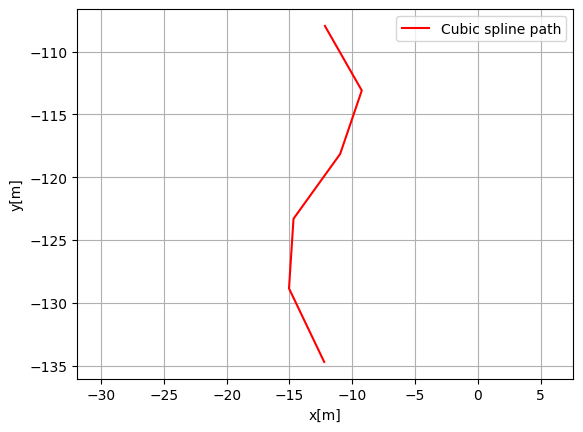

In [5]:
plt.subplots(1)
# plt.plot(x, y, "xb", label="Data points")
plt.plot(rx, ry, "-r", label="Cubic spline path")
plt.grid(True)
plt.axis("equal")
plt.xlabel("x[m]")
plt.ylabel("y[m]")
plt.legend()
plt.show()

In [31]:
wp_list = [[[-16.9213924407959, -219.0595703125, 10.0, 1.5668718926125558], [-16.90569305419922, -215.05960083007812, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05963134765625, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.0596466064453, 10.0, 1.5668718926125558], [-16.90569496154785, -215.05967712402344, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05970764160156, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.0596923828125, 10.0, 1.5668718926125558], [-16.90569496154785, -215.05972290039062, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05975341796875, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.05970764160156, 10.0, 1.5668718926125558], [-16.90569496154785, -215.0597381591797, 10.0, 1.5668718926125558], [-16.889995574951172, -211.0597686767578, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.05972290039062, 10.0, 1.5668718926125558], [-16.90569496154785, -215.05975341796875, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05978393554688, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.05972290039062, 10.0, 1.5668718926125558], [-16.90569496154785, -215.05975341796875, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05978393554688, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.05972290039062, 10.0, 1.5668718926125558], [-16.90569496154785, -215.05975341796875, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05978393554688, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.05972290039062, 10.0, 1.5668718926125558], [-16.90569496154785, -215.05975341796875, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05978393554688, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.05972290039062, 10.0, 1.5668718926125558], [-16.90569496154785, -215.05975341796875, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05978393554688, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.05972290039062, 10.0, 1.5668718926125558], [-16.90569496154785, -215.05975341796875, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05978393554688, 10.0, 1.5668718926125558]], [[-30.9213924407959, -219.05972290039062, 10.0, 1.5668718926125558], [-30.90569496154785, -215.05975341796875, 10.0, 1.5668718926125558], [-30.889995574951172, -211.05978393554688, 10.0, 1.5668718926125558]], [[-30.9213924407959, -219.05972290039062, 10.0, 1.5668718926125558], [-30.90569496154785, -215.05975341796875, 10.0, 1.5668718926125558], [-30.889995574951172, -211.05978393554688, 10.0, 1.5668718926125558]], [[-30.9213924407959, -219.0597381591797, 10.0, 1.5668718926125558], [-30.90569496154785, -215.0597686767578, 10.0, 1.5668718926125558], [-30.889995574951172, -211.05979919433594, 10.0, 1.5668718926125558]], [[-30.9213924407959, -219.0597381591797, 10.0, 1.5668718926125558], [-16.90569496154785, -215.0597686767578, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05979919433594, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.0597381591797, 10.0, 1.5668718926125558], [-16.90569496154785, -215.0597686767578, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05979919433594, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.0597381591797, 10.0, 1.5668718926125558], [-16.90569496154785, -215.0597686767578, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05979919433594, 10.0, 1.5668718926125558]], [[-16.9213924407959, -219.0597381591797, 10.0, 1.5668718926125558], [-16.90569496154785, -215.0597686767578, 10.0, 1.5668718926125558], [-16.889995574951172, -211.05979919433594, 10.0, 1.5668718926125558]], [[-16.92133331298828, -219.04478454589844, 10.0, 1.5668718926125558], [-16.905635833740234, -215.04481506347656, 10.0, 1.5668718926125558], [-16.889938354492188, -211.0448455810547, 10.0, 1.5668718926125558]], [[-16.92071533203125, -218.886962890625, 10.0, 1.5668718926125558], [-16.90501594543457, -214.88699340820312, 10.0, 1.5668718926125558], [-16.889318466186523, -210.88702392578125, 10.0, 1.5668718926125558]], [[-16.91974639892578, -218.63990783691406, 10.0, 1.5668718926125558], [-16.9040470123291, -214.63995361328125, 10.0, 1.5668718926125558], [-16.888349533081055, -210.63998413085938, 10.0, 1.5668718926125558]], [[-16.918590545654297, -218.34571838378906, 10.0, 1.5668718926125558], [-16.90289306640625, -214.3457489013672, 10.0, 1.5668718926125558], [-16.88719367980957, -210.3457794189453, 10.0, 1.5668718926125558]], [[-16.91787338256836, -218.16317749023438, 10.0, 1.5668718926125558], [-16.902175903320312, -214.1632080078125, 10.0, 1.5668718926125558], [-16.886478424072266, -210.16323852539062, 10.0, 1.5668718926125558]], [[-16.916488647460938, -217.81031799316406, 10.0, 1.5668718926125558], [-16.90079116821289, -213.8103485107422, 10.0, 1.5668718926125558], [-16.885093688964844, -209.8103790283203, 10.0, 1.5668718926125558]], [[-16.915016174316406, -217.43472290039062, 10.0, 1.5668718926125558], [-16.899316787719727, -213.43475341796875, 10.0, 1.5668718926125558], [-16.88361930847168, -209.43478393554688, 10.0, 1.5668718926125558]], [[-16.91345977783203, -217.03834533691406, 10.0, 1.5668718926125558], [-16.897762298583984, -213.0383758544922, 10.0, 1.5668718926125558], [-16.882062911987305, -209.0384063720703, 10.0, 1.5668718926125558]], [[-16.911828994750977, -216.62274169921875, 10.0, 1.5668718926125558], [-16.896129608154297, -212.62277221679688, 10.0, 1.5668718926125558], [-16.88043212890625, -208.622802734375, 10.0, 1.5668718926125558]], [[-16.910127639770508, -216.1891632080078, 10.0, 1.5668718926125558], [-16.894428253173828, -212.18917846679688, 10.0, 1.5668718926125558], [-16.87873077392578, -208.18922424316406, 10.0, 1.5668718926125558]], [[-16.908357620239258, -215.7384796142578, 10.0, 1.5668718926125558], [-16.89266014099121, -211.73851013183594, 10.0, 1.5668718926125558], [-16.876962661743164, -207.73854064941406, 10.0, 1.5668718926125558]], [[-16.906526565551758, -215.2716827392578, 10.0, 1.5668718926125558], [-16.890827178955078, -211.27171325683594, 10.0, 1.5668718926125558], [-16.87512969970703, -207.27174377441406, 10.0, 1.5668718926125558]], [[-16.904634475708008, -214.7897186279297, 10.0, 1.5668718926125558], [-16.88893699645996, -210.7897491455078, 10.0, 1.5668718926125558], [-16.87323760986328, -206.78977966308594, 10.0, 1.5668718926125558]], [[-16.902687072753906, -214.29324340820312, 10.0, 1.5668718926125558], [-16.886987686157227, -210.29327392578125, 10.0, 1.5668718926125558], [-16.87129020690918, -206.29330444335938, 10.0, 1.5668718926125558]], [[-16.900697708129883, -213.7864227294922, 10.0, 1.5668718926125558], [-16.884998321533203, -209.7864532470703, 10.0, 1.5668718926125558], [-16.869300842285156, -205.78648376464844, 10.0, 1.5668718926125558]], [[-16.898712158203125, -213.28036499023438, 10.0, 1.5668718926125558], [-16.883012771606445, -209.2803955078125, 10.0, 1.5668718926125558], [-16.8673152923584, -205.28042602539062, 10.0, 1.5668718926125558]], [[-16.8967342376709, -212.77679443359375, 10.0, 1.5668718926125558], [-16.88103675842285, -208.77682495117188, 10.0, 1.5668718926125558], [-16.865337371826172, -204.77685546875, 10.0, 1.5668718926125558]], [[-16.894760131835938, -212.27346801757812, 10.0, 1.5668718926125558], [-16.879060745239258, -208.27349853515625, 10.0, 1.5668718926125558], [-16.86336326599121, -204.27352905273438, 10.0, 1.5668718926125558]], [[-16.89276695251465, -211.76585388183594, 10.0, 1.5668718926125558], [-16.8770694732666, -207.76588439941406, 10.0, 1.5668718926125558], [-16.861370086669922, -203.7659149169922, 10.0, 1.5668718926125558]], [[-16.8907470703125, -211.25123596191406, 10.0, 1.5668718926125558], [-16.875049591064453, -207.2512664794922, 10.0, 1.5668718926125558], [-16.859352111816406, -203.2512969970703, 10.0, 1.5668718926125558]], [[-16.888694763183594, -210.72817993164062, 10.0, 1.5668718926125558], [-16.872997283935547, -206.72821044921875, 10.0, 1.5668718926125558], [-16.857297897338867, -202.72824096679688, 10.0, 1.5668718926125558]], [[-16.886606216430664, -210.196044921875, 10.0, 1.5668718926125558], [-16.870908737182617, -206.19607543945312, 10.0, 1.5668718926125558], [-16.855209350585938, -202.19610595703125, 10.0, 1.5668718926125558]], [[-16.88448143005371, -209.6545867919922, 10.0, 1.5668718926125558], [-16.868783950805664, -205.6546173095703, 10.0, 1.5668718926125558], [-16.853084564208984, -201.65464782714844, 10.0, 1.5668718926125558]], [[-16.882320404052734, -209.1038818359375, 10.0, 1.5668718926125558], [-16.866622924804688, -205.10391235351562, 10.0, 1.5668718926125558], [-16.850923538208008, -201.10394287109375, 10.0, 1.5668718926125558]], [[-16.880123138427734, -208.5443115234375, 10.0, 1.5668718926125558], [-16.864425659179688, -204.54434204101562, 10.0, 1.5668718926125558], [-16.84872817993164, -200.54437255859375, 10.0, 1.5668718926125558]], [[-16.87789535522461, -207.9761505126953, 10.0, 1.5668718926125558], [-16.86219596862793, -203.97618103027344, 10.0, 1.5668718926125558], [-16.846498489379883, -199.97621154785156, 10.0, 1.5668718926125558]], [[-16.875633239746094, -207.39979553222656, 10.0, 1.5668718926125558], [-16.859933853149414, -203.3998260498047, 10.0, 1.5668718926125558], [-16.844236373901367, -199.3998565673828, 10.0, 1.5668718926125558]], [[-16.873340606689453, -206.81568908691406, 10.0, 1.5668718926125558], [-16.857641220092773, -202.8157196044922, 10.0, 1.5668718926125558], [-16.841943740844727, -198.8157501220703, 10.0, 1.5668718926125558]], [[-16.87101936340332, -206.2241973876953, 10.0, 1.5668718926125558], [-16.85531997680664, -202.22422790527344, 10.0, 1.5668718926125558], [-16.839622497558594, -198.22425842285156, 10.0, 1.5668718926125558]], [[-16.868669509887695, -205.62570190429688, 10.0, 1.5668718926125558], [-16.85297203063965, -201.625732421875, 10.0, 1.5668718926125558], [-16.83727264404297, -197.62576293945312, 10.0, 1.5668718926125558]], [[-16.866294860839844, -205.0205841064453, 10.0, 1.5668718926125558], [-16.850597381591797, -201.02061462402344, 10.0, 1.5668718926125558], [-16.834897994995117, -197.02064514160156, 10.0, 1.5668718926125558]], [[-16.863895416259766, -204.40916442871094, 10.0, 1.5668718926125558], [-16.84819793701172, -200.40919494628906, 10.0, 1.5668718926125558], [-16.83249855041504, -196.4092254638672, 10.0, 1.5668718926125558]], [[-16.861473083496094, -203.79180908203125, 10.0, 1.5668718926125558], [-16.845773696899414, -199.79183959960938, 10.0, 1.5668718926125558], [-16.830076217651367, -195.7918701171875, 10.0, 1.5668718926125558]], [[-16.859027862548828, -203.16883850097656, 10.0, 1.5668718926125558], [-16.84333038330078, -199.1688690185547, 10.0, 1.5668718926125558], [-16.8276309967041, -195.1688995361328, 10.0, 1.5668718926125558]], [[-16.8565616607666, -202.54051208496094, 10.0, 1.5668718926125558], [-16.840864181518555, -198.54054260253906, 10.0, 1.5668718926125558], [-16.825164794921875, -194.5405731201172, 10.0, 1.5668718926125558]], [[-16.854076385498047, -201.90721130371094, 10.0, 1.5668718926125558], [-16.83837890625, -197.90724182128906, 10.0, 1.5668718926125558], [-16.82267951965332, -193.9072723388672, 10.0, 1.5668718926125558]], [[-16.851572036743164, -201.26910400390625, 10.0, 1.5668718926125558], [-16.835872650146484, -197.26913452148438, 10.0, 1.5668718926125558], [-16.820175170898438, -193.2691650390625, 10.0, 1.5668718926125558]], [[-16.849050521850586, -200.62648010253906, 10.0, 1.5668718926125558], [-16.833351135253906, -196.6265106201172, 10.0, 1.5668718926125558], [-16.81765365600586, -192.6265411376953, 10.0, 1.5668718926125558]], [[-16.846511840820312, -199.97958374023438, 10.0, 1.5668718926125558], [-16.830812454223633, -195.9796142578125, 10.0, 1.5668718926125558], [-16.815114974975586, -191.97964477539062, 10.0, 1.5668718926125558]], [[-16.843955993652344, -199.32862854003906, 10.0, 1.5668718926125558], [-16.828258514404297, -195.3286590576172, 10.0, 1.5668718926125558], [-16.81256103515625, -191.3286895751953, 10.0, 1.5668718926125558]], [[-16.841386795043945, -198.6739044189453, 10.0, 1.5668718926125558], [-16.8256893157959, -194.67393493652344, 10.0, 1.5668718926125558], [-16.80998992919922, -190.67396545410156, 10.0, 1.5668718926125558]], [[-16.838802337646484, -198.01560974121094, 10.0, 1.5668718926125558], [-16.823104858398438, -194.01564025878906, 10.0, 1.5668718926125558], [-16.80740737915039, -190.0156707763672, 10.0, 1.5668718926125558]], [[-16.836206436157227, -197.35386657714844, 10.0, 1.5668718926125558], [-16.820507049560547, -193.35389709472656, 10.0, 1.5668718926125558], [-16.8048095703125, -189.3539276123047, 10.0, 1.5668718926125558]], [[-16.83359718322754, -196.6888885498047, 10.0, 1.5668718926125558], [-16.81789779663086, -192.6889190673828, 10.0, 1.5668718926125558], [-16.802200317382812, -188.68894958496094, 10.0, 1.5668718926125558]], [[-16.830974578857422, -196.0209197998047, 10.0, 1.5668718926125558], [-16.815277099609375, -192.0209503173828, 10.0, 1.5668718926125558], [-16.799579620361328, -188.02098083496094, 10.0, 1.5668718926125558]], [[-16.82834243774414, -195.3500213623047, 10.0, 1.5668718926125558], [-16.812644958496094, -191.3500518798828, 10.0, 1.5668718926125558], [-16.796945571899414, -187.35008239746094, 10.0, 1.5668718926125558]], [[-16.825698852539062, -194.6763916015625, 10.0, 1.5668718926125558], [-16.809999465942383, -190.67642211914062, 10.0, 1.5668718926125558], [-16.794301986694336, -186.67645263671875, 10.0, 1.5668718926125558]], [[-16.823043823242188, -194.00018310546875, 10.0, 1.5668718926125558], [-16.80734634399414, -190.00021362304688, 10.0, 1.5668718926125558], [-16.791648864746094, -186.000244140625, 10.0, 1.5668718926125558]], [[-16.82038116455078, -193.32151794433594, 10.0, 1.5668718926125558], [-16.804683685302734, -189.32154846191406, 10.0, 1.5668718926125558], [-16.788984298706055, -185.3215789794922, 10.0, 1.5668718926125558]], [[-16.81770896911621, -192.6405487060547, 10.0, 1.5668718926125558], [-16.80200958251953, -188.6405792236328, 10.0, 1.5668718926125558], [-16.786312103271484, -184.64060974121094, 10.0, 1.5668718926125558]], [[-16.815027236938477, -191.95742797851562, 10.0, 1.5668718926125558], [-16.79932975769043, -187.95745849609375, 10.0, 1.5668718926125558], [-16.78363037109375, -183.95748901367188, 10.0, 1.5668718926125558]], [[-16.81233787536621, -191.2721710205078, 10.0, 1.5668718926125558], [-16.796640396118164, -187.27220153808594, 10.0, 1.5668718926125558], [-16.780941009521484, -183.27223205566406, 10.0, 1.5668718926125558]], [[-16.809640884399414, -190.5849609375, 10.0, 1.5668718926125558], [-16.793943405151367, -186.58499145507812, 10.0, 1.5668718926125558], [-16.778244018554688, -182.58502197265625, 10.0, 1.5668718926125553]], [[-16.80693817138672, -189.89598083496094, 10.0, 1.5668718926125558], [-16.79123878479004, -185.89601135253906, 10.0, 1.5668718926125558], [-16.775541305541992, -181.8960418701172, 10.0, 1.5668718926125553]], [[-16.80422592163086, -189.2052001953125, 10.0, 1.5668718926125558], [-16.788528442382812, -185.20523071289062, 10.0, 1.5668718926125558], [-16.772829055786133, -181.20526123046875, 10.0, 1.5668718926125553]], [[-16.801509857177734, -188.51278686523438, 10.0, 1.5668718926125558], [-16.785810470581055, -184.5128173828125, 10.0, 1.5668718926125558], [-16.770112991333008, -180.51284790039062, 10.0, 1.5668718926125553]], [[-16.798786163330078, -187.81884765625, 10.0, 1.5668718926125558], [-16.7830867767334, -183.81887817382812, 10.0, 1.5668718926125558], [-16.76738929748535, -179.81890869140625, 10.0, 1.5668718926125553]], [[-16.796056747436523, -187.1234130859375, 10.0, 1.5668718926125558], [-16.780357360839844, -183.12344360351562, 10.0, 1.5668718926125558], [-16.764659881591797, -179.1234588623047, 10.0, 1.5668718926125553]], [[-16.79332160949707, -186.4265899658203, 10.0, 1.5668718926125558], [-16.77762222290039, -182.42662048339844, 10.0, 1.5668718926125553], [-16.761924743652344, -178.42665100097656, 10.0, 1.5668718926125553]], [[-16.79058074951172, -185.72842407226562, 10.0, 1.5668718926125558], [-16.774883270263672, -181.72845458984375, 10.0, 1.5668718926125553], [-16.759185791015625, -177.72848510742188, 10.0, 1.5668718926125553]], [[-16.7878360748291, -185.02902221679688, 10.0, 1.5668718926125558], [-16.772138595581055, -181.029052734375, 10.0, 1.5668718926125553], [-16.756439208984375, -177.02908325195312, 10.0, 1.5668718926125553]], [[-16.78508758544922, -184.3284454345703, 10.0, 1.5668718926125558], [-16.76938819885254, -180.32847595214844, 10.0, 1.5668718926125553], [-16.753690719604492, -176.32850646972656, 10.0, 1.5668718926125553]], [[-16.782333374023438, -183.62672424316406, 10.0, 1.5668718926125558], [-16.766633987426758, -179.6267547607422, 10.0, 1.5668718926125553], [-16.75093650817871, -175.6267852783203, 10.0, 1.5668718926125553]], [[-16.77957534790039, -182.92398071289062, 10.0, 1.5668718926125553], [-16.763877868652344, -178.92401123046875, 10.0, 1.5668718926125553], [-16.748178482055664, -174.92404174804688, 10.0, 1.5668718926125553]], [[-16.776813507080078, -182.22027587890625, 10.0, 1.5668718926125553], [-16.76111602783203, -178.22030639648438, 10.0, 1.5668718926125553], [-16.74541664123535, -174.2203369140625, 10.0, 1.5668718926125553]], [[-16.7740478515625, -181.51559448242188, 10.0, 1.5668718926125553], [-16.758350372314453, -177.515625, 10.0, 1.5668718926125553], [-16.742650985717773, -173.51565551757812, 10.0, 1.5668718926125553]], [[-16.771278381347656, -180.8099822998047, 10.0, 1.5668718926125553], [-16.75558090209961, -176.8100128173828, 10.0, 1.5668718926125553], [-16.73988151550293, -172.81004333496094, 10.0, 1.5668718926125553]], [[-16.768505096435547, -180.1035614013672, 10.0, 1.5668718926125553], [-16.7528076171875, -176.1035919189453, 10.0, 1.5668718926125553], [-16.737110137939453, -172.10362243652344, 10.0, 1.5668718926125553]], [[-16.765729904174805, -179.39633178710938, 10.0, 1.5668718926125553], [-16.750032424926758, -175.3963623046875, 10.0, 1.5668718926125553], [-16.734333038330078, -171.39639282226562, 10.0, 1.5668718926125553]], [[-16.764055252075195, -178.9693603515625, 10.0, 1.5668718926125553], [-16.748355865478516, -174.96939086914062, 10.0, 1.5668718926125553], [-16.73265838623047, -170.96942138671875, 10.0, 1.5668718926125553]], [[-16.761272430419922, -178.26068115234375, 10.0, 1.5668718926125553], [-16.745574951171875, -174.26071166992188, 10.0, 1.5668718926125553], [-16.729877471923828, -170.2607421875, 10.0, 1.5668718926125553]], [[-16.75848960876465, -177.55130004882812, 10.0, 1.5668718926125553], [-16.74279022216797, -173.55133056640625, 10.0, 1.5668718926125553], [-16.727092742919922, -169.55136108398438, 10.0, 1.5668718926125553]], [[-16.75570297241211, -176.84127807617188, 10.0, 1.5668718926125553], [-16.740005493164062, -172.84130859375, 10.0, 1.5668718926125553], [-16.724306106567383, -168.84133911132812, 10.0, 1.5668718926125553]], [[-16.752914428710938, -176.13067626953125, 10.0, 1.5668718926125553], [-16.73721694946289, -172.13070678710938, 10.0, 1.5668718926125553], [-16.72151756286621, -168.1307373046875, 10.0, 1.5668718926125553]], [[-16.7501220703125, -175.4195098876953, 10.0, 1.5668718926125553], [-16.734424591064453, -171.41954040527344, 10.0, 1.5668718926125553], [-16.718727111816406, -167.41957092285156, 10.0, 1.5668718926125553]], [[-16.747329711914062, -174.70777893066406, 10.0, 1.5668718926125553], [-16.731632232666016, -170.7078094482422, 10.0, 1.5668718926125553], [-16.715932846069336, -166.7078399658203, 10.0, 1.5668718926125553]], [[-16.74453353881836, -173.99551391601562, 10.0, 1.5668718926125553], [-16.728836059570312, -169.99554443359375, 10.0, 1.5668718926125553], [-16.713138580322266, -165.99557495117188, 10.0, 1.5668718926125553]], [[-16.741737365722656, -173.2827911376953, 10.0, 1.5668718926125553], [-16.72603988647461, -169.28282165527344, 10.0, 1.5668718926125553], [-16.71034049987793, -165.28285217285156, 10.0, 1.5668718926125553]], [[-16.73893928527832, -172.5696563720703, 10.0, 1.5668718926125553], [-16.72323989868164, -168.56968688964844, 10.0, 1.5668718926125553], [-16.707542419433594, -164.56973266601562, 10.0, 1.5668718926125553]], [[-16.73613739013672, -171.85606384277344, 10.0, 1.5668718926125553], [-16.720439910888672, -167.85609436035156, 10.0, 1.5668718926125553], [-16.704742431640625, -163.85614013671875, 10.0, 1.5668718926125553]], [[-16.733335494995117, -171.14205932617188, 10.0, 1.5668718926125553], [-16.71763801574707, -167.14208984375, 10.0, 1.5668718926125553], [-16.70193862915039, -163.1421356201172, 10.0, 1.5668718926125553]], [[-16.730531692504883, -170.4276885986328, 10.0, 1.5668718926125553], [-16.714834213256836, -166.42771911621094, 10.0, 1.5668718926125553], [-16.699134826660156, -162.42776489257812, 10.0, 1.5668718926125553]], [[-16.72772789001465, -169.7129364013672, 10.0, 1.5668718926125553], [-16.71202850341797, -165.7129669189453, 10.0, 1.5668718926125553], [-16.696331024169922, -161.7130126953125, 10.0, 1.5668718926125553]], [[-16.72492027282715, -168.99781799316406, 10.0, 1.5668718926125553], [-16.7092227935791, -164.99786376953125, 10.0, 1.5668718926125553], [-16.693523406982422, -160.99789428710938, 10.0, 1.5668718926125558]], [[-16.72211265563965, -168.2823944091797, 10.0, 1.5668718926125553], [-16.7064151763916, -164.28244018554688, 10.0, 1.5668718926125553], [-16.690715789794922, -160.282470703125, 10.0, 1.5668718926125558]], [[-16.719303131103516, -167.56666564941406, 10.0, 1.5668718926125553], [-16.70360565185547, -163.56671142578125, 10.0, 1.5668718926125553], [-16.687908172607422, -159.56674194335938, 10.0, 1.5668718926125558]], [[-16.716493606567383, -166.8506622314453, 10.0, 1.5668718926125553], [-16.700796127319336, -162.8507080078125, 10.0, 1.5668718926125553], [-16.685096740722656, -158.85073852539062, 10.0, 1.5668718926125558]], [[-16.713682174682617, -166.13436889648438, 10.0, 1.5668718926125553], [-16.69798469543457, -162.13441467285156, 10.0, 1.5668718926125553], [-16.68228530883789, -158.1344451904297, 10.0, 1.5668718926125558]], [[-16.71087074279785, -165.41783142089844, 10.0, 1.5668718926125553], [-16.695171356201172, -161.41787719726562, 10.0, 1.5668718926125553], [-16.679473876953125, -157.41790771484375, 10.0, 1.5668718926125558]], [[-16.708057403564453, -164.7010498046875, 10.0, 1.5668718926125553], [-16.692359924316406, -160.70108032226562, 10.0, 1.5668718926125558], [-16.676660537719727, -156.70111083984375, 10.0, 1.5668718926125558]], [[-16.705244064331055, -163.98399353027344, 10.0, 1.5668718926125553], [-16.689544677734375, -159.98402404785156, 10.0, 1.5668718926125558], [-16.673847198486328, -155.9840545654297, 10.0, 1.5668718926125558]], [[-16.702428817749023, -163.26673889160156, 10.0, 1.5668718926125553], [-16.686729431152344, -159.2667694091797, 10.0, 1.5668718926125558], [-16.671031951904297, -155.2667999267578, 10.0, 1.5668718926125558]], [[-16.699613571166992, -162.54930114746094, 10.0, 1.5668718926125553], [-16.683914184570312, -158.54933166503906, 10.0, 1.5668718926125558], [-16.668216705322266, -154.5493621826172, 10.0, 1.5668718926125558]], [[-16.696796417236328, -161.8316650390625, 10.0, 1.5668718926125553], [-16.68109893798828, -157.83169555664062, 10.0, 1.5668718926125558], [-16.6653995513916, -153.83172607421875, 10.0, 1.5668718926125558]], [[-16.693979263305664, -161.11383056640625, 10.0, 1.5668718926125553], [-16.678279876708984, -157.11386108398438, 10.0, 1.5668718926125558], [-16.662582397460938, -153.1138916015625, 10.0, 1.5668718926125558]], [[-16.691162109375, -160.3958282470703, 10.0, 1.5668718926125558], [-16.67546272277832, -156.39585876464844, 10.0, 1.5668718926125558], [-16.659765243530273, -152.39588928222656, 10.0, 1.5668718926125558]], [[-16.688343048095703, -159.67762756347656, 10.0, 1.5668718926125558], [-16.672643661499023, -155.6776580810547, 10.0, 1.5668718926125558], [-16.656946182250977, -151.6776885986328, 10.0, 1.5668718926125558]], [[-16.685523986816406, -158.95928955078125, 10.0, 1.5668718926125558], [-16.669824600219727, -154.95932006835938, 10.0, 1.5668718926125558], [-16.65412712097168, -150.9593505859375, 10.0, 1.5668718926125558]], [[-16.682703018188477, -158.24081420898438, 10.0, 1.5668718926125558], [-16.66700553894043, -154.2408447265625, 10.0, 1.5668718926125558], [-16.65130615234375, -150.24087524414062, 10.0, 1.5668718926125558]], [[-16.67988395690918, -157.5221710205078, 10.0, 1.5668718926125558], [-16.6641845703125, -153.52220153808594, 10.0, 1.5668718926125558], [-16.648487091064453, -149.52223205566406, 10.0, 1.5668718926125558]], [[-16.67706298828125, -156.8034210205078, 10.0, 1.5668718926125558], [-16.66136360168457, -152.80345153808594, 10.0, 1.5668718926125558], [-16.645666122436523, -148.80348205566406, 10.0, 1.5668718926125558]], [[-16.674240112304688, -156.08453369140625, 10.0, 1.5668718926125558], [-16.65854263305664, -152.08456420898438, 10.0, 1.5668718926125558], [-16.642845153808594, -148.0845947265625, 10.0, 1.5668718926125558]], [[-16.671419143676758, -155.3655242919922, 10.0, 1.5668718926125558], [-16.65572166442871, -151.3655548095703, 10.0, 1.5668718926125558], [-16.64002227783203, -147.36558532714844, 10.0, 1.5668718926125558]], [[-16.668598175048828, -154.6464080810547, 10.0, 1.5668718926125558], [-16.65289878845215, -150.6464385986328, 10.0, 1.5668718926125558], [-16.6372013092041, -146.64646911621094, 10.0, 1.5668718926125558]], [[-16.665775299072266, -153.9272003173828, 10.0, 1.5668718926125558], [-16.650075912475586, -149.92723083496094, 10.0, 1.5668718926125558], [-16.63437843322754, -145.92726135253906, 10.0, 1.5668718926125558]], [[-16.662952423095703, -153.2078857421875, 10.0, 1.5668718926125558], [-16.647253036499023, -149.20791625976562, 10.0, 1.5668718926125558], [-16.631555557250977, -145.20794677734375, 10.0, 1.5668718926125558]], [[-16.660127639770508, -152.48846435546875, 10.0, 1.5668718926125558], [-16.64443016052246, -148.48849487304688, 10.0, 1.5668718926125558], [-16.62873077392578, -144.488525390625, 10.0, 1.5668718926125558]], [[-16.657304763793945, -151.7689666748047, 10.0, 1.5668718926125558], [-16.641605377197266, -147.7689971923828, 10.0, 1.5668718926125558], [-16.62590789794922, -143.76902770996094, 10.0, 1.5668718926125558]], [[-16.65447998046875, -151.0493621826172, 10.0, 1.5668718926125558], [-16.638782501220703, -147.0493927001953, 10.0, 1.5668718926125558], [-16.623083114624023, -143.04942321777344, 10.0, 1.5668718926125558]], [[-16.651655197143555, -150.32969665527344, 10.0, 1.5668718926125558], [-16.635957717895508, -146.32972717285156, 10.0, 1.5668718926125558], [-16.620258331298828, -142.3297576904297, 10.0, 1.5668718926125558]], [[-16.64883041381836, -149.60995483398438, 10.0, 1.5668718926125558], [-16.633132934570312, -145.6099853515625, 10.0, 1.5668718926125558], [-16.617435455322266, -141.61001586914062, 10.0, 1.5668718926125558]], [[-16.646005630493164, -148.89013671875, 10.0, 1.5668718926125558], [-16.630308151245117, -144.89016723632812, 10.0, 1.5668718926125558], [-16.614608764648438, -140.89019775390625, 10.0, 1.5668718926125558]], [[-16.64318084716797, -148.17025756835938, 10.0, 1.5668718926125558], [-16.627483367919922, -144.1702880859375, 10.0, 1.5668718926125558], [-16.611783981323242, -140.17031860351562, 10.0, 1.5668718926125558]], [[-16.640356063842773, -147.4503173828125, 10.0, 1.5668718926125558], [-16.624656677246094, -143.45034790039062, 10.0, 1.5668718926125558], [-16.608959197998047, -139.45037841796875, 10.0, 1.5668718926125558]], [[-16.637529373168945, -146.7303009033203, 10.0, 1.5668718926125558], [-16.6218318939209, -142.73033142089844, 10.0, 1.5668718926125558], [-16.60613250732422, -138.73036193847656, 10.0, 1.5668718926125558]], [[-16.63470458984375, -146.01023864746094, 10.0, 1.5668718926125558], [-16.61900520324707, -142.01026916503906, 10.0, 1.5668718926125558], [-16.603307723999023, -138.0102996826172, 10.0, 1.5668718926125558]], [[-16.631877899169922, -145.29010009765625, 10.0, 1.5668718926125558], [-16.616178512573242, -141.29013061523438, 10.0, 1.5668718926125558], [-16.600481033325195, -137.2901611328125, 10.0, 1.5668718926125558]], [[-16.629051208496094, -144.5699462890625, 10.0, 1.5668718926125558], [-16.613353729248047, -140.56997680664062, 10.0, 1.5668718926125558], [-16.597654342651367, -136.57000732421875, 10.0, 1.5668718926125558]], [[-16.626224517822266, -143.84971618652344, 10.0, 1.5668718926125558], [-16.61052703857422, -139.84974670410156, 10.0, 1.5668718926125558], [-16.59482765197754, -135.8497772216797, 10.0, 1.5668718926125558]], [[-16.623397827148438, -143.12945556640625, 10.0, 1.5668718926125558], [-16.60770034790039, -139.12948608398438, 10.0, 1.5668718926125558], [-16.59200096130371, -135.1295166015625, 10.0, 1.5668718926125558]], [[-16.62057113647461, -142.4091339111328, 10.0, 1.5668718926125558], [-16.604873657226562, -138.40916442871094, 10.0, 1.5668718926125558], [-16.589174270629883, -134.40919494628906, 10.0, 1.5668718926125558]], [[-16.61774444580078, -141.68878173828125, 10.0, 1.5668718926125558], [-16.6020450592041, -137.68881225585938, 10.0, 1.5668718926125558], [-16.586347579956055, -133.6888427734375, 10.0, 1.5668718926125558]], [[-16.61491584777832, -140.96839904785156, 10.0, 1.5668718926125558], [-16.599218368530273, -136.9684295654297, 10.0, 1.5668718926125558], [-16.583520889282227, -132.9684600830078, 10.0, 1.5668718926125558]], [[-16.612089157104492, -140.2479705810547, 10.0, 1.5668718926125558], [-16.596391677856445, -136.2480010986328, 10.0, 1.5668718926125558], [-16.580692291259766, -132.24803161621094, 10.0, 1.5668718926125558]], [[-16.609262466430664, -139.5275115966797, 10.0, 1.5668718926125558], [-16.593563079833984, -135.5275421142578, 10.0, 1.5668718926125558], [-16.577865600585938, -131.52757263183594, 10.0, 1.5668718926125558]], [[-16.606433868408203, -138.80702209472656, 10.0, 1.5668718926125558], [-16.590736389160156, -134.8070526123047, 10.0, 1.5668718926125558], [-16.575037002563477, -130.8070831298828, 10.0, 1.5668718926125558]], [[-16.603607177734375, -138.08648681640625, 10.0, 1.5668718926125558], [-16.587907791137695, -134.08651733398438, 10.0, 1.5668718926125558], [-16.57221031188965, -130.0865478515625, 10.0, 1.5668718926125558]], [[-16.600778579711914, -137.36593627929688, 10.0, 1.5668718926125558], [-16.585079193115234, -133.365966796875, 10.0, 1.5668718926125558], [-16.569381713867188, -129.36599731445312, 10.0, 1.5668718926125558]], [[-16.597949981689453, -136.64535522460938, 10.0, 1.5668718926125558], [-16.582252502441406, -132.6453857421875, 10.0, 1.5668718926125558], [-16.56655502319336, -128.64541625976562, 10.0, 1.5668718926125558]], [[-16.595123291015625, -135.9247589111328, 10.0, 1.5668718926125558], [-16.579423904418945, -131.92478942871094, 10.0, 1.5668718926125558], [-16.5637264251709, -127.92481994628906, 10.0, 1.5668718926125558]], [[-16.592294692993164, -135.20411682128906, 10.0, 1.5668718926125558], [-16.576595306396484, -131.2041473388672, 10.0, 1.5668718926125558], [-16.560897827148438, -127.20417785644531, 10.0, 1.5668718926125558]], [[-16.589466094970703, -134.48345947265625, 10.0, 1.5668718926125558], [-16.573768615722656, -130.48348999023438, 10.0, 1.5668718926125558], [-16.558069229125977, -126.4835205078125, 10.0, 1.5668718926125558]], [[-16.586637496948242, -133.76278686523438, 10.0, 1.5668718926125558], [-16.570940017700195, -129.7628173828125, 10.0, 1.5668718926125558], [-16.555240631103516, -125.76284790039062, 10.0, 1.5668718926125558]], [[-16.58380889892578, -133.04208374023438, 10.0, 1.5668718926125558], [-16.568111419677734, -129.0421142578125, 10.0, 1.5668718926125558], [-16.552412033081055, -125.04214477539062, 10.0, 1.5668718926125558]], [[-16.58098030090332, -132.32138061523438, 10.0, 1.5668718926125558], [-16.565282821655273, -128.3214111328125, 10.0, 1.5668718926125558], [-16.549583435058594, -124.32144165039062, 10.0, 1.5668718926125558]], [[-16.57815170288086, -131.60061645507812, 10.0, 1.5668718926125558], [-16.562454223632812, -127.60064697265625, 10.0, 1.5668718926125558], [-16.546754837036133, -123.6006851196289, 10.0, 1.5668718926125558]], [[-16.5753231048584, -130.87986755371094, 10.0, 1.5668718926125558], [-16.55962562561035, -126.87989807128906, 10.0, 1.5668718926125558], [-16.543926239013672, -122.87992858886719, 10.0, 1.5668718926125558]], [[-16.572494506835938, -130.15911865234375, 10.0, 1.5668718926125558], [-16.55679702758789, -126.15914916992188, 10.0, 1.5668718926125558], [-16.54109764099121, -122.1591796875, 10.0, 1.5668718926125558]], [[-16.569665908813477, -129.43832397460938, 10.0, 1.5668718926125558], [-16.553966522216797, -125.4383544921875, 10.0, 1.5668718926125558], [-16.53826904296875, -121.43838500976562, 10.0, 1.5668718926125558]], [[-16.566837310791016, -128.717529296875, 10.0, 1.5668718926125558], [-16.55113983154297, -124.71755981445312, 10.0, 1.5668718926125558], [-16.53544044494629, -120.71759033203125, 10.0, 1.5668718926125558]], [[-16.564008712768555, -127.99671936035156, 10.0, 1.5668718926125558], [-16.548309326171875, -123.99674987792969, 10.0, 1.5668718926125558], [-16.532611846923828, -119.99678039550781, 10.0, 1.5668718926125558]], [[-16.561180114746094, -127.27586364746094, 10.0, 1.5668718926125558], [-16.545480728149414, -123.27589416503906, 10.0, 1.5668718926125558], [-16.529783248901367, -119.27592468261719, 10.0, 1.5668718926125558]], [[-16.558349609375, -126.55502319335938, 10.0, 1.5668718926125558], [-16.542652130126953, -122.5550537109375, 10.0, 1.5668718926125558], [-16.526954650878906, -118.55508422851562, 10.0, 1.5668718926125558]], [[-16.55552101135254, -125.83416748046875, 10.0, 1.5668718926125558], [-16.539823532104492, -121.83419799804688, 10.0, 1.5668718926125558], [-16.524124145507812, -117.834228515625, 10.0, 1.5668718926125558]], [[-16.552692413330078, -125.11331176757812, 10.0, 1.5668718926125558], [-16.5369930267334, -121.11334228515625, 10.0, 1.5668718926125558], [-16.52129554748535, -117.11337280273438, 10.0, 1.5668718926125558]], [[-16.549861907958984, -124.39247131347656, 10.0, 1.5668718926125558], [-16.534164428710938, -120.39250183105469, 10.0, 1.5668718926125558], [-16.51846694946289, -116.39253234863281, 10.0, 1.5668718926125558]], [[-16.547033309936523, -123.67156982421875, 10.0, 1.5668718926125558], [-16.531335830688477, -119.67160034179688, 10.0, 1.5668718926125558], [-16.515636444091797, -115.671630859375, 10.0, 1.5668718926125558]], [[-16.544204711914062, -122.95067596435547, 10.0, 1.5668718926125558], [-16.528507232666016, -118.9507064819336, 10.0, 1.5668718926125558], [-16.512807846069336, -114.95073699951172, 10.0, 1.5668718926125558]], [[-16.54137420654297, -122.22977447509766, 10.0, 1.5668718926125558], [-16.525676727294922, -118.22980499267578, 10.0, 1.5668718926125558], [-16.509979248046875, -114.2298355102539, 10.0, 1.5668718926125558]], [[-16.538545608520508, -121.50888061523438, 10.0, 1.5668718926125558], [-16.52284812927246, -117.5089111328125, 10.0, 1.5668718926125558], [-16.50714874267578, -113.50894165039062, 10.0, 1.5668718926125558]], [[-16.535717010498047, -120.78794860839844, 10.0, 1.5668718926125558], [-16.520017623901367, -116.78797912597656, 10.0, 1.5668718926125558], [-16.50432014465332, -112.78800964355469, 10.0, 1.5668718926125558]], [[-16.532886505126953, -120.06700134277344, 10.0, 1.5668718926125558], [-16.517189025878906, -116.06703186035156, 10.0, 1.5668718926125558], [-16.50149154663086, -112.06706237792969, 10.0, 1.5668718926125558]], [[-16.530057907104492, -119.34605407714844, 10.0, 1.5668718926125558], [-16.514358520507812, -115.34608459472656, 10.0, 1.5668718926125558], [-16.498661041259766, -111.34611511230469, 10.0, 1.5668718926125558]], [[-16.52722930908203, -118.62510681152344, 10.0, 1.5668718926125558], [-16.51152992248535, -114.62513732910156, 10.0, 1.5668718926125558], [-16.495832443237305, -110.62516784667969, 10.0, 1.5668718926125558]], [[-16.524398803710938, -117.9041519165039, 10.0, 1.5668718926125558], [-16.50870132446289, -113.90418243408203, 10.0, 1.5668718926125558], [-16.49300193786621, -109.90421295166016, 10.0, 1.5668718926125558]], [[-16.521570205688477, -117.18321228027344, 10.0, 1.5668718926125558], [-16.505870819091797, -113.18324279785156, 10.0, 1.5668718926125558], [-16.49017333984375, -109.18327331542969, 10.0, 1.5668718926125558]], [[-16.518739700317383, -116.46226501464844, 10.0, 1.5668718926125558], [-16.503042221069336, -112.46229553222656, 10.0, 1.5668718926125558], [-16.487342834472656, -108.46232604980469, 10.0, 1.5668718926125558]], [[-16.515911102294922, -115.7413101196289, 10.0, 1.5668718926125558], [-16.500211715698242, -111.74134063720703, 10.0, 1.5668718926125558], [-16.484514236450195, -107.74137115478516, 10.0, 1.5668718926125558]], [[-16.513080596923828, -115.02037048339844, 10.0, 1.5668718926125558], [-16.49738311767578, -111.02040100097656, 10.0, 1.5668718926125558], [-16.481685638427734, -107.02043151855469, 10.0, 1.5668718926125558]], [[-16.510251998901367, -114.2994155883789, 10.0, 1.5668718926125558], [-16.494552612304688, -110.29944610595703, 10.0, 1.5668718926125558], [-16.47885513305664, -106.29947662353516, 10.0, 1.5668718926125558]], [[-16.507421493530273, -113.57841491699219, 10.0, 1.5668718926125558], [-16.491724014282227, -109.57844543457031, 10.0, 1.5668718926125558], [-16.47602653503418, -105.57848358154297, 10.0, 1.5668718926125558]], [[-16.504592895507812, -112.857421875, 10.0, 1.5668718926125558], [-16.488895416259766, -108.85745239257812, 10.0, 1.5668718926125558], [-16.473196029663086, -104.85748291015625, 10.0, 1.5668718926125558]], [[-16.50176239013672, -112.13642883300781, 10.0, 1.5668718926125558], [-16.486064910888672, -108.13645935058594, 10.0, 1.5668718926125558], [-16.470367431640625, -104.13648986816406, 10.0, 1.5668718926125558]], [[-16.498933792114258, -111.41543579101562, 10.0, 1.5668718926125558], [-16.483234405517578, -107.41546630859375, 10.0, 1.5668718926125558], [-16.46753692626953, -103.41549682617188, 10.0, 1.5668718926125558]], [[-16.496103286743164, -110.6944351196289, 10.0, 1.5668718926125558], [-16.480405807495117, -106.69447326660156, 10.0, 1.5668718926125558], [-16.464706420898438, -102.69450378417969, 10.0, 1.5668718926125558]], [[-16.493274688720703, -109.97344207763672, 10.0, 1.5668718926125558], [-16.477575302124023, -105.97347259521484, 10.0, 1.5668718926125558], [-16.461877822875977, -101.97350311279297, 10.0, 1.5668718926125558]], [[-16.49044418334961, -109.25244140625, 10.0, 1.5668718926125558], [-16.474746704101562, -105.25247192382812, 10.0, 1.5668718926125558], [-16.459047317504883, -101.25250244140625, 10.0, 1.5668718926125558]], [[-16.48761558532715, -108.53144073486328, 10.0, 1.5668718926125558], [-16.47191619873047, -104.5314712524414, 10.0, 1.5668718926125558], [-16.456218719482422, -100.53150177001953, 10.0, 1.5668718926125558]], [[-16.484785079956055, -107.8104476928711, 10.0, 1.5668718926125558], [-16.469087600708008, -103.81047821044922, 10.0, 1.5668718926125558], [-16.453388214111328, -99.81050872802734, 10.0, 1.5668718926125558]], [[-16.481956481933594, -107.08946228027344, 10.0, 1.5668718926125558], [-16.466257095336914, -103.08949279785156, 10.0, 1.5668718926125558], [-16.450559616088867, -99.08952331542969, 10.0, 1.5668718926125558]], [[-16.4791259765625, -106.36843872070312, 10.0, 1.5668718926125558], [-16.463428497314453, -102.36846923828125, 10.0, 1.5668718926125558], [-16.447729110717773, -98.36849212646484, 10.0, 1.5668718926125553]], [[-16.476295471191406, -105.64739990234375, 10.0, 1.5668718926125558], [-16.46059799194336, -101.64743041992188, 10.0, 1.5668718926125558], [-16.444900512695312, -97.64745330810547, 10.0, 1.5668718926125553]], [[-16.473466873168945, -104.92634582519531, 10.0, 1.5668718926125558], [-16.457767486572266, -100.92637634277344, 10.0, 1.5668718926125558], [-16.44207000732422, -96.92639923095703, 10.0, 1.5668718926125553]], [[-16.47063636779785, -104.20530700683594, 10.0, 1.5668718926125558], [-16.454938888549805, -100.20533752441406, 10.0, 1.5668718926125558], [-16.439239501953125, -96.20536041259766, 10.0, 1.5668718926125553]], [[-16.46780776977539, -103.48426055908203, 10.0, 1.5668718926125558], [-16.45210838317871, -99.48429107666016, 10.0, 1.5668718926125558], [-16.436410903930664, -95.48430633544922, 10.0, 1.5668718926125553]], [[-16.464977264404297, -102.76322174072266, 10.0, 1.5668718926125558], [-16.44927978515625, -98.76325225830078, 10.0, 1.5668718926125558], [-16.43358039855957, -94.76326751708984, 10.0, 1.5668718926125553]]]

In [12]:
import argparse

argparser = argparse.ArgumentParser(
    description='CARLA Manual Control Client')
argparser.add_argument(
    '-v', '--verbose',
    action='store_true',
    dest='debug',
    help='print debug information')
argparser.add_argument(
    '--host',
    metavar='H',
    default='127.0.0.1',
    help='IP of the host server (default: 127.0.0.1)')
argparser.add_argument(
    '-p', '--port',
    metavar='P',
    default=2000,
    type=int,
    help='TCP port to listen to (default: 2000)')
argparser.add_argument(
    '-a', '--autopilot',
    action='store_true',
    help='enable autopilot')
argparser.add_argument(
    '--res',
    metavar='WIDTHxHEIGHT',
    default='1280x720',
    help='window resolution (default: 1280x720)')
argparser.add_argument(
    '--filter',
    metavar='PATTERN',
    default='vehicle.*',
    help='actor filter (default: "vehicle.*")')
argparser.add_argument(
    '--rolename',
    metavar='NAME',
    default='hero',
    help='actor role name (default: "hero")')
argparser.add_argument(
    '--gamma',
    default=2.2,
    type=float,
    help='Gamma correction of the camera (default: 2.2)')
argparser.add_argument(
    '--map',
    metavar='NAME',
    default='Town04',
    help='simulation map (default: "Town04")')
argparser.add_argument(
    '--spawn_x',
    metavar='x',
    default='-16.75', #town04 = -16.75
    help='x position to spawn the agent')
argparser.add_argument(
    '--spawn_y',
    metavar='y',
    default='-223.55', #town04 = -223.55
    help='y position to spawn the agent')
argparser.add_argument(
    '--random_spawn',        
    metavar='RS',
    default='0',
    type=int,
    help='Random spawn agent')
argparser.add_argument(
    '--vehicle_id',
    metavar='NAME',
    # default='vehicle.jeep.wrangler_rubicon',
    default='vehicle.tesla.model3',
    help='vehicle to spawn, available options : vehicle.audi.a2 vehicle.audi.tt vehicle.carlamotors.carlacola vehicle.citroen.c3 vehicle.dodge_charger.police vehicle.jeep.wrangler_rubicon vehicle.yamaha.yzf vehicle.nissan.patrol vehicle.gazelle.omafiets vehicle.bh.crossbike vehicle.ford.mustang vehicle.bmw.isetta vehicle.audi.etron vehicle.harley-davidson.low rider vehicle.mercedes-benz.coupe vehicle.bmw.grandtourer vehicle.toyota.prius vehicle.diamondback.century vehicle.tesla.model3 vehicle.seat.leon vehicle.lincoln.mkz2017 vehicle.kawasaki.ninja vehicle.volkswagen.t2 vehicle.nissan.micra vehicle.chevrolet.impala vehicle.mini.cooperst')
argparser.add_argument(
    '--vehicle_wheelbase',
    metavar='NAME',
    type=float,
    default='2.89',
    help='vehicle wheelbase used for model predict control')
argparser.add_argument(
    '--waypoint_resolution',
    metavar='WR',
    default='3',
    type=float,
    help='waypoint resulution for control')
argparser.add_argument(
    '--waypoint_lookahead_distance',
    metavar='WLD',
    default='6',
    type=float,
    help='waypoint look ahead distance for control')
argparser.add_argument(
    '--desired_speed',
    metavar='SPEED',
    default='10',
    type=float,
    help='desired speed for highway driving')
argparser.add_argument(
    '--control_mode',
    metavar='CONT',
    default='PID',
    help='Controller')
argparser.add_argument(
    '--planning_horizon',
    metavar='HORIZON',
    type=int,
    default='3',
    help='Planning horizon for MPC')
argparser.add_argument(
    '--time_step',
    metavar='DT',
    default='0.4',
    type=float,
    help='Planning time step for MPC')
argparser.add_argument(
    '--FPS',
    metavar='FPS',
    default='10',
    type=int,
    help='Frame per second for simulation')

args = argparser.parse_args()

args.width, args.height = [int(x) for x in args.res.split('x')]

In [13]:
client = carla.Client(args.host, args.port)
client.set_timeout(100.0)

In [16]:
carla_world = client.load_world(args.map)

In [14]:
carla_world = client.get_world()

In [17]:
settings = carla_world.get_settings()

In [18]:
settings

In [19]:
carla_world.apply_settings(carla.WorldSettings(
            no_rendering_mode=False,
            synchronous_mode=False,
            fixed_delta_seconds=0))

1020

In [16]:
blueprint_library = carla_world.get_blueprint_library()
vehicle_blueprint = blueprint_library.filter('*vehicle*')
walker_blueprint = blueprint_library.filter('*walker.*')

spawn_location = carla.Location()
spawn_location.x = float(args.spawn_x)
spawn_location.y = float(args.spawn_y)
spawn_waypoint = carla_world.get_map().get_waypoint(spawn_location)
spawn_transform = spawn_waypoint.transform
spawn_transform.location.z = 1.0
player = carla_world.try_spawn_actor(vehicle_blueprint.filter('model3')[0], spawn_transform)

print('vehicle spawned')

# carla_world.tick()

vehicle spawned


In [14]:
spectator = carla_world.get_spectator()
transform = player.get_transform()
spectator.set_transform(carla.Transform(transform.location + carla.Location(y=15,z=58.5), carla.Rotation(pitch=-90)))
carla_world.tick()

AttributeError: 'NoneType' object has no attribute 'get_transform'

In [12]:
player.destroy()

AttributeError: 'NoneType' object has no attribute 'destroy'

In [ ]:
camera = world.spawn_actor(blueprint, transform)
image_queue = queue.Queue()
camera.listen(image_queue.put)

while True:
    world.tick()
    image = image_queue.get()

In [ ]:
def game_loop(args): 
    world=None   
    try: 
        client = carla.Client(args.host, args.port)
        client.set_timeout(100.0)
        hud = HUD()
        # carla_world = client.load_world(args.map)
        carla_world = client.get_world()
        world = World(carla_world, hud, args)
        controller = VehicleControl(world)

        clock = pygame.time.Clock()
        while True:
            # clock.tick(5)
            clock.tick_busy_loop(args.FPS)
            # pygame.time.dalay(500)
            if controller.parse_events(client, world, clock):
                return
            # world.tick(clock)

    finally:

            if world is not None:
                world.destroy()        

In [12]:
from stable_baselines3.common.env_checker import check_env



In [14]:
carla_world = client.get_world()

In [104]:
def print_waypoints(waypoints):

    for z in waypoints:
        spawn_location_r = carla.Location()
        spawn_location_r.x = float(z[0])
        spawn_location_r.y = float(z[1])
        spawn_location_r.z = 1.0
        carla_world.debug.draw_string(spawn_location_r, 'O', draw_shadow=False,
                                            color=carla.Color(r=255, g=0, b=0), life_time=3,
                                            persistent_lines=True)


In [120]:
wp = [[-16.9213924407959, -219.0597381591797, 10.0, 1.5668718926125558],
            [-14.90569496154785, -214.0597686767578, 10.0, 1.5668718926125558],
            [-15.889995574951172, -209.05979919433594, 10.0, 1.5668718926125558]]

In [121]:
print_waypoints(wp)

In [ ]:
import numpy as np
x = np.array([-17, -16.92, -14.905, -15.889])
y =np.array([-223, -219.06, -214.059, -209.059])
from Utils.CubicSpline.cubic_spline_planner import *
import matplotlib.pyplot as plt
ds = 2  # [m] distance of each interpolated points
sp = CubicSpline2D(x, y)
s = np.arange(0, sp.s[-1], ds)
rx, ry, ryaw, rk = [], [], [], []
for i_s in s:
    ix, iy = sp.calc_position(i_s)
    rx.append(ix)
    ry.append(iy)
    ryaw.append(sp.calc_yaw(i_s))
    rk.append(sp.calc_curvature(i_s))
plt.subplots(1)
plt.plot(x, y, "xb", label="Data points")
plt.plot(rx, ry, "-r", label="Cubic spline path")
plt.grid(True)
plt.axis("equal")
plt.xlabel("x[m]")
plt.ylabel("y[m]")
plt.legend()
plt.show()

In [168]:
nw_wp = []
for i in range(len(rx)):
    nw_wp.append([rx[i], ry[i], 10, ryaw[i]])

In [169]:
nw_wp

[[-17.0, -223.0, 10, 1.6622929659971877],
 [-17.128428899804334, -220.97127382740322, 10, 1.5763471497497819],
 [-16.905022029111326, -219.00319923898854, 10, 1.3078331996412615],
 [-16.144495993151335, -217.13111889803488, 10, 1.1110514800055202],
 [-15.271232976129594, -215.29773207052136, 10, 1.1876684583767758],
 [-14.84357250695423, -213.42525607415212, 10, 1.540416296446312],
 [-15.090595680318604, -211.4783987630481, 10, 1.8178663577832002],
 [-15.731605211814061, -209.4876544816092, 10, 1.9205984879816247]]

In [170]:
print_waypoints(nw_wp)